<a href="https://colab.research.google.com/github/InterVam/Flu-Shot-Learning-Predict-H1N1-and-Seasonal-Flu-Vaccines/blob/main/Flu_Shot_Learning_Predict_H1N1_and_Seasonal_Flu_Vaccines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

train_labels = pd.read_csv('training_set_labels.csv')
train_features = pd.read_csv('training_set_features.csv')
test_features = pd.read_csv('test_set_features.csv')
submission_format = pd.read_csv("submission_format.csv")
train_labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [ ]:
train_features.head()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [ ]:
train_features = train_features.drop(columns = ["respondent_id"], axis = 1)
train_labels = train_labels.drop(columns = ["respondent_id"], axis = 1)
test_features = test_features.drop(columns = ["respondent_id"], axis = 1)

def summary(df):
    print("summary (qualitative)")
    print("------------------------------")
    print(df.astype('object').describe())
    print("------------------------------")
    print("summary (quantitative)")
    print("------------------------------")
    print(df.describe())
    print("------------------------------")
    print("columns types")
    print(df.dtypes)
    print("------------------------------")
    print("missing values")
    print(df.isna().sum())
    print("------------------------------")
    print("duplicated values")
    print(df.duplicated().any())
    print("------------------------------")
    print("shape")
    print(df.shape)
summary(train_features)

summary (qualitative)
------------------------------
        h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count        26615.0         26591.0                    26636.0   
unique           4.0             3.0                        2.0   
top              2.0             1.0                        0.0   
freq         10575.0         14598.0                    25335.0   

        behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count                26499.0               26688.0                26665.0   
unique                   2.0                   2.0                    2.0   
top                      1.0                   0.0                    1.0   
freq                 19228.0               24847.0                22015.0   

        behavioral_large_gatherings  behavioral_outside_home  \
count                       26620.0                  26625.0   
unique                          2.0                      2.0   
top                             0

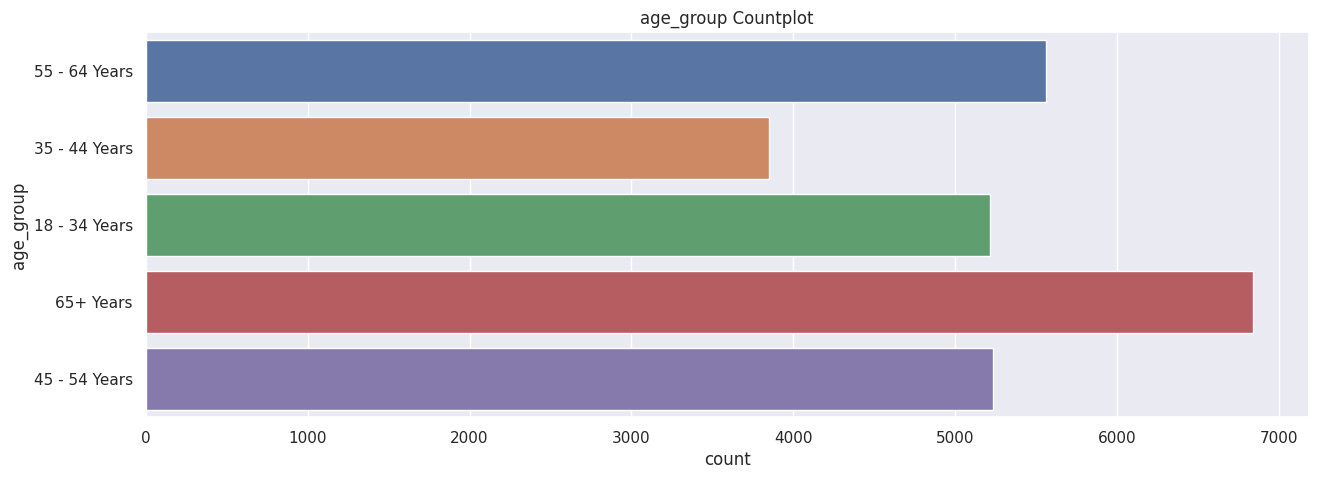

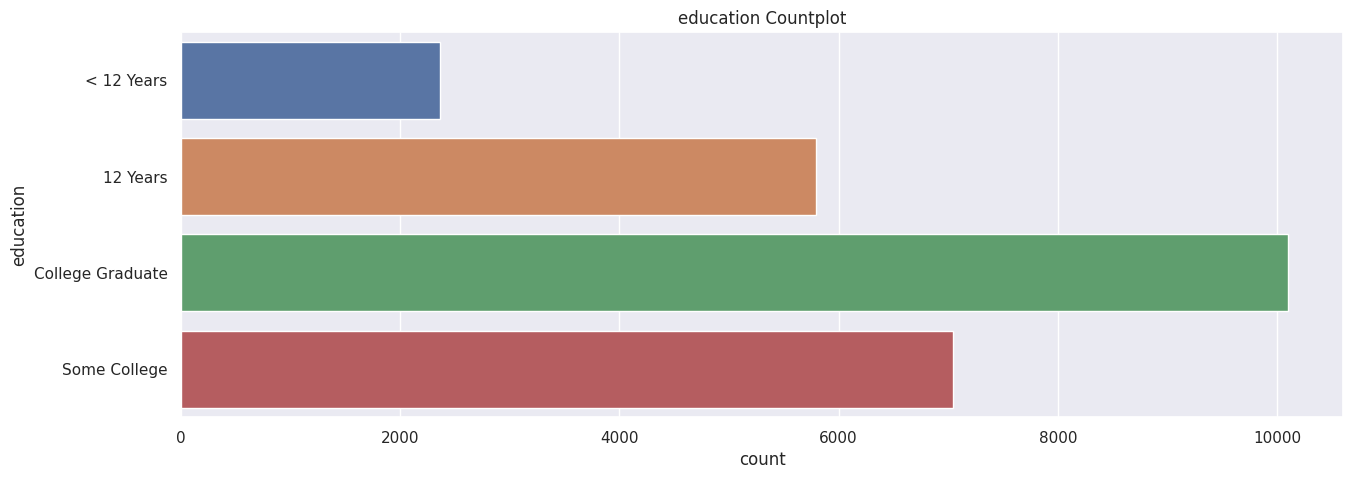

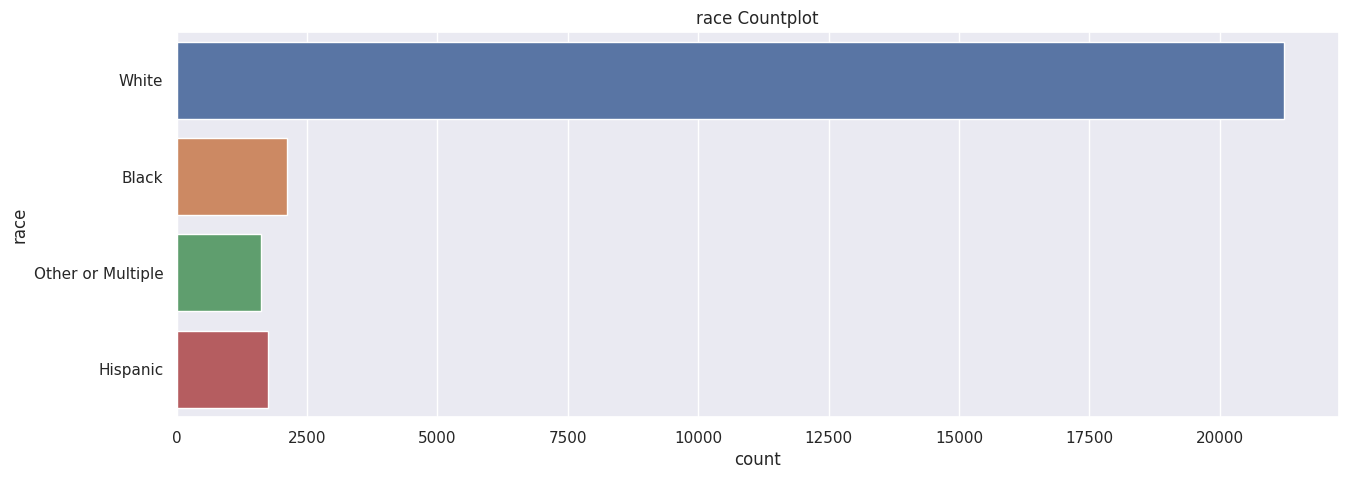

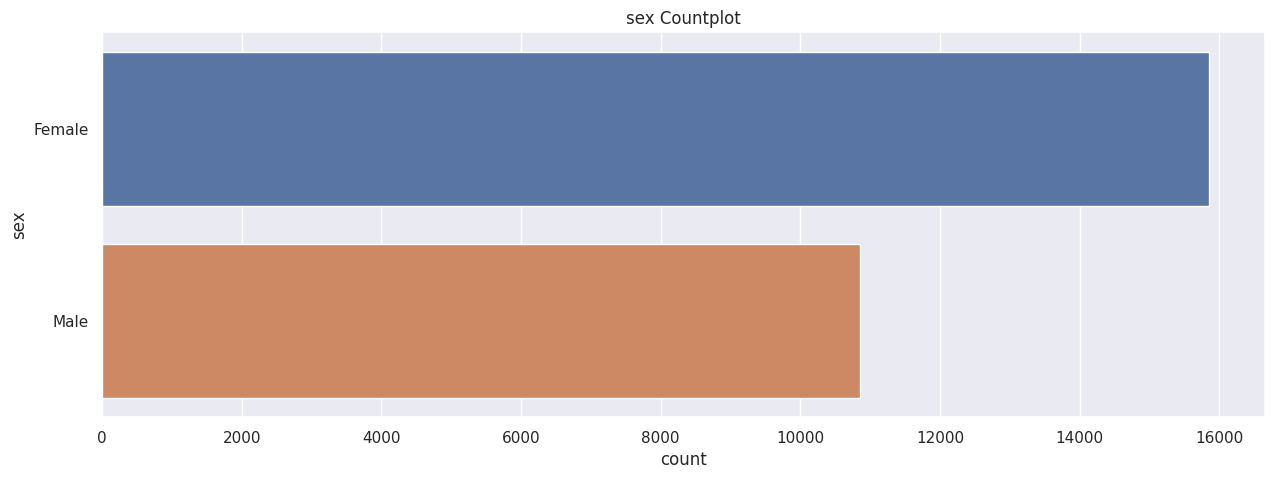

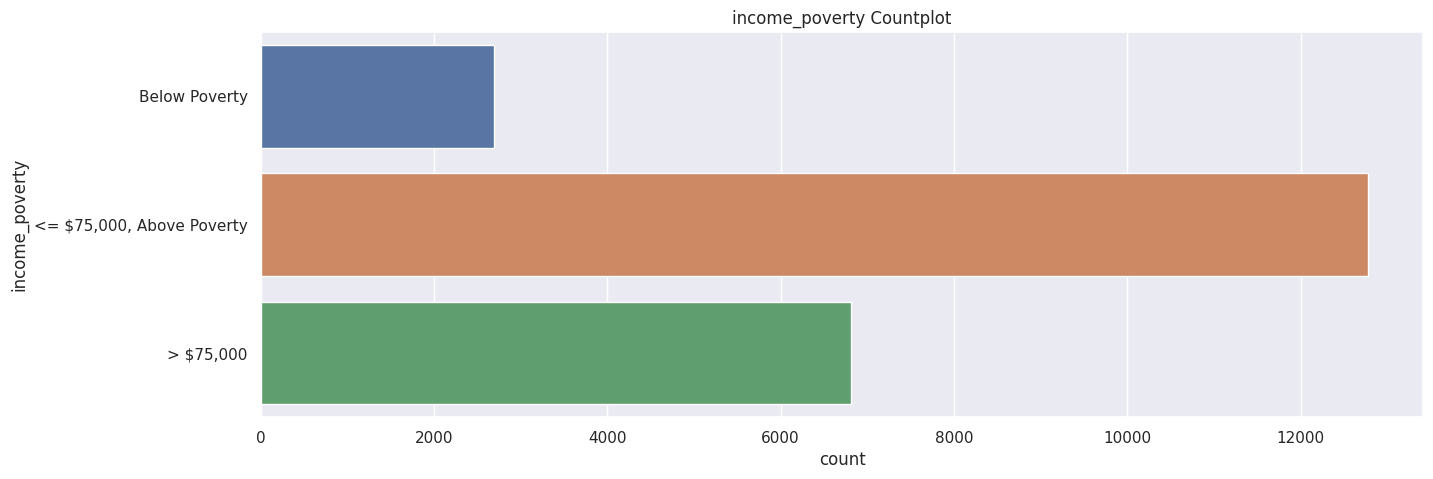

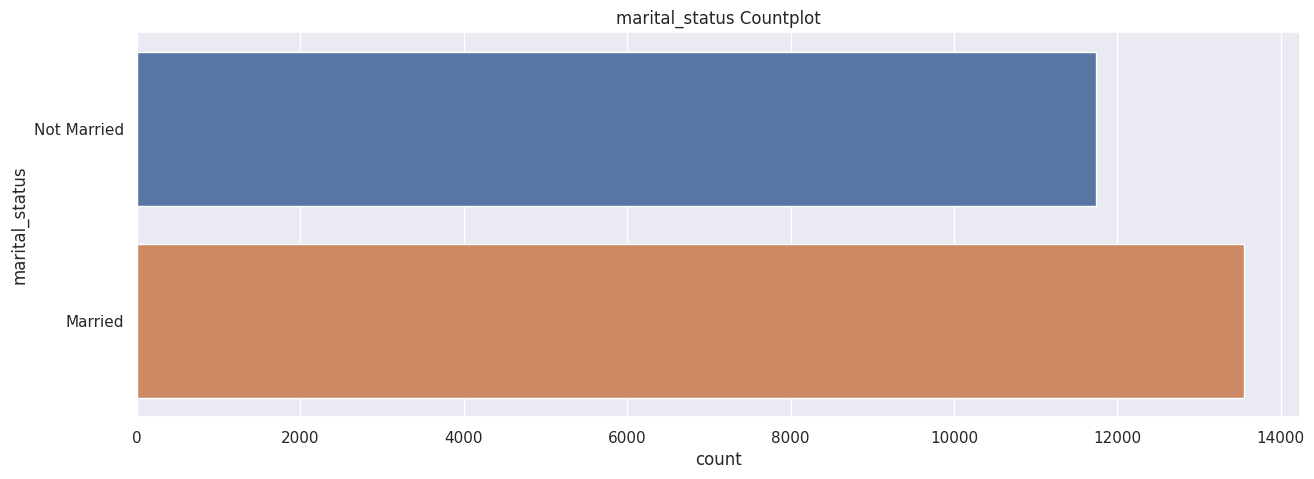

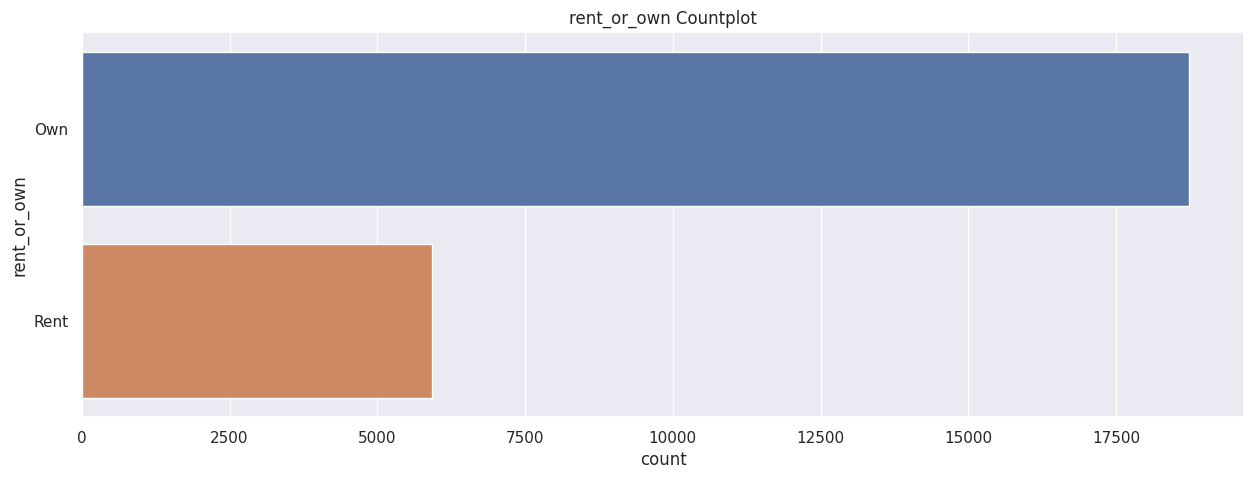

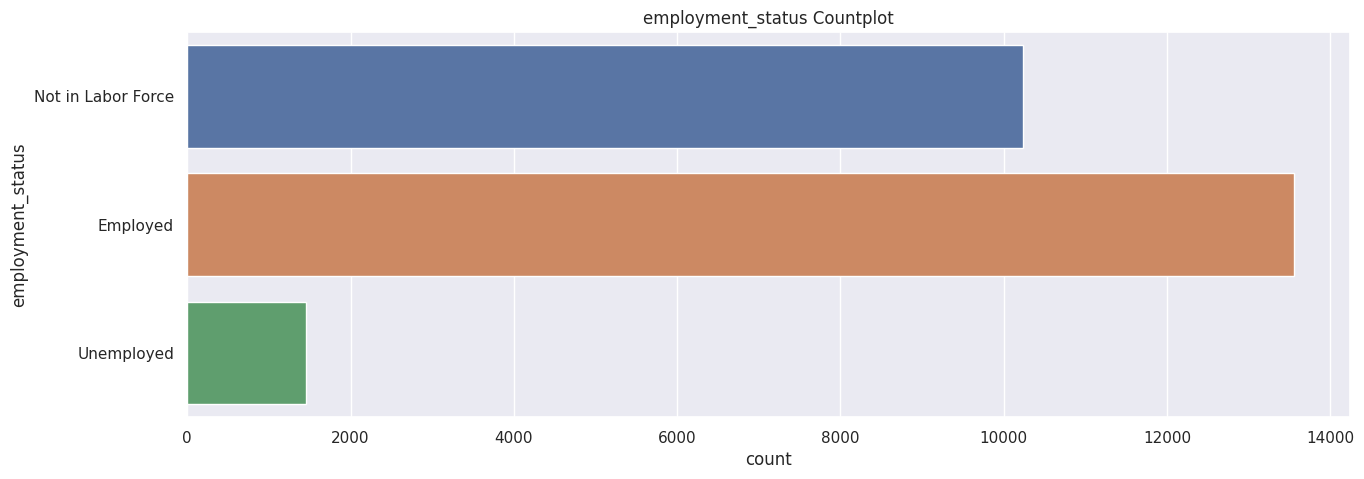

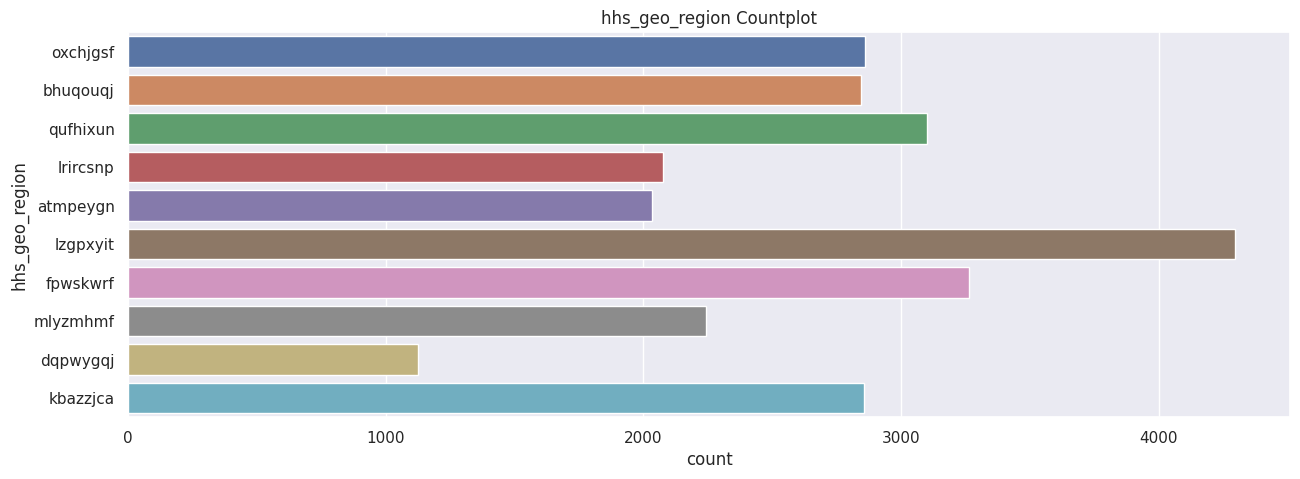

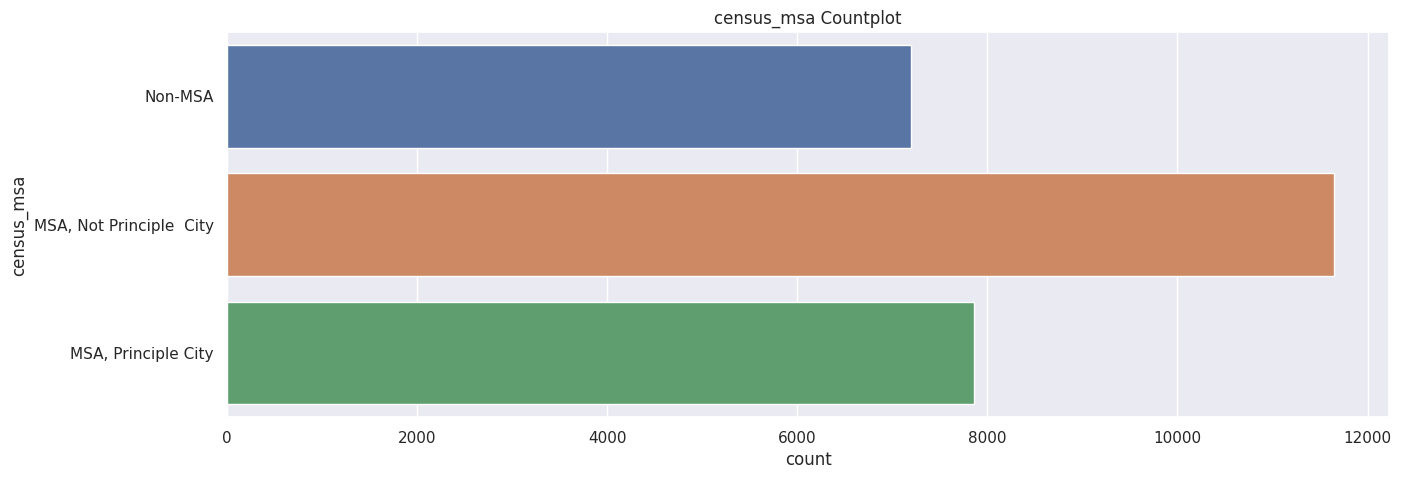

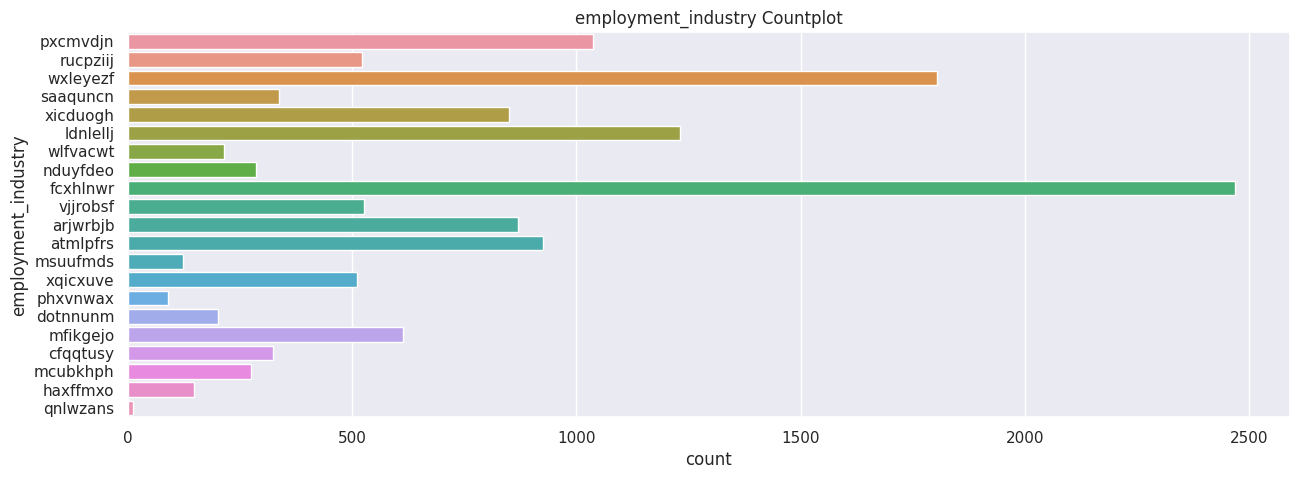

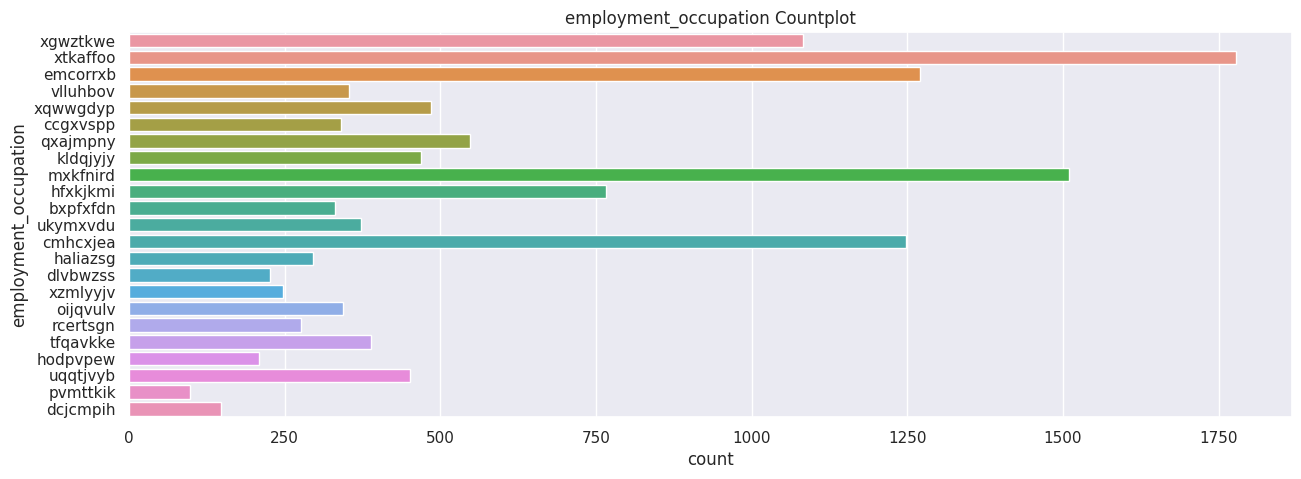

In [ ]:
for col in train_features[train_features.dtypes[train_features.dtypes == "object"].index].columns:
    sns.set(rc={'figure.figsize':(15,5)})
    sns.countplot(y = train_features[col])
    plt.title( col +" Countplot")
    plt.xticks(rotation=0)
    plt.show()

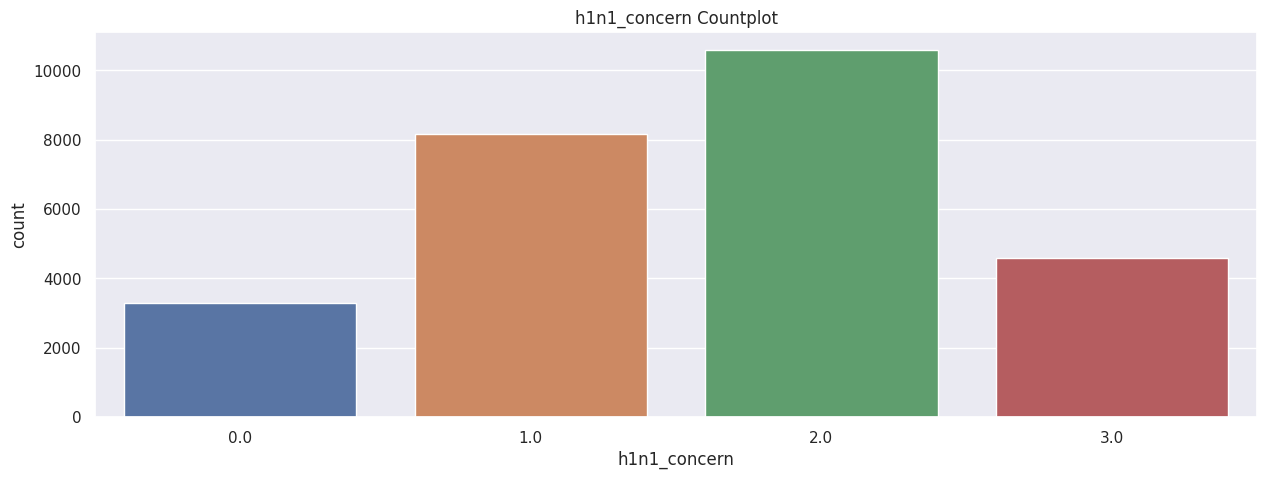

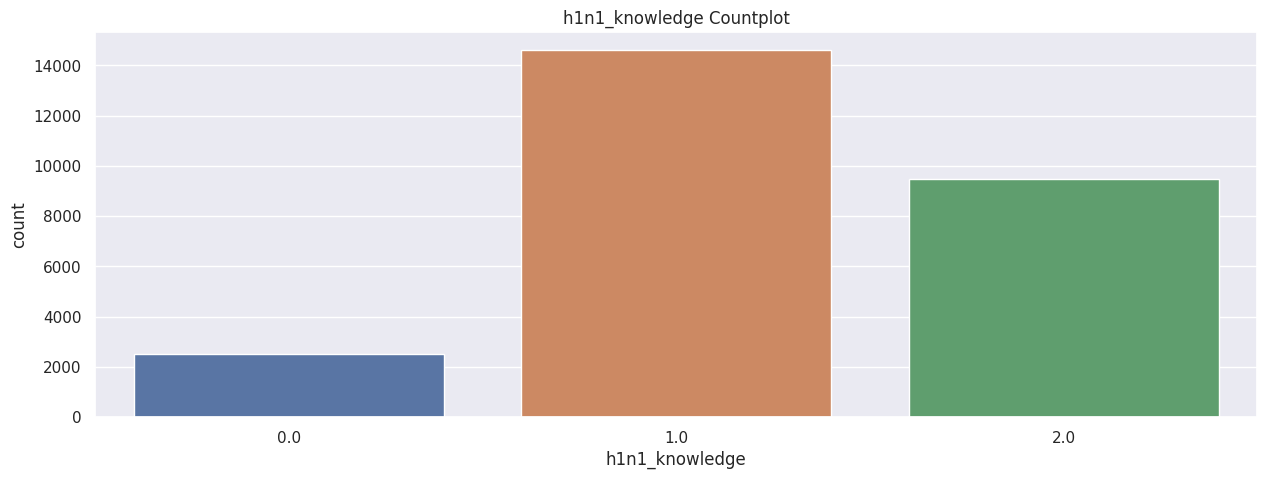

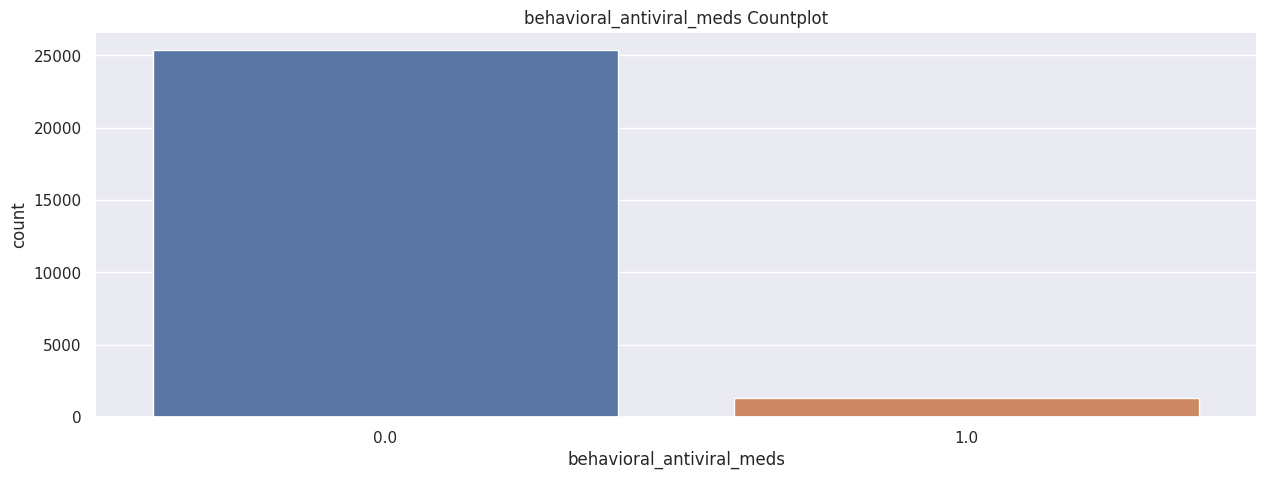

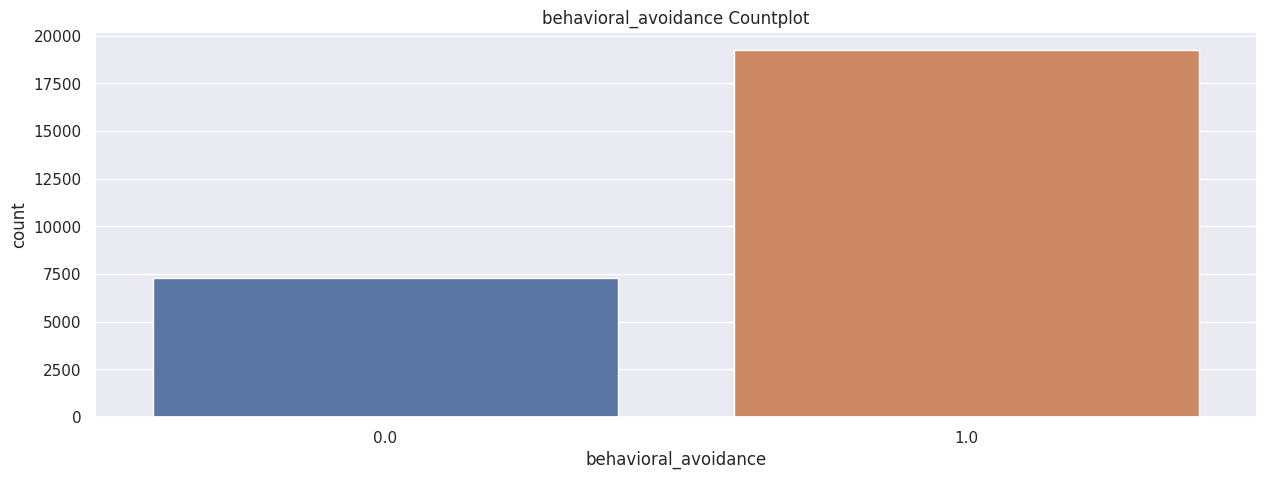

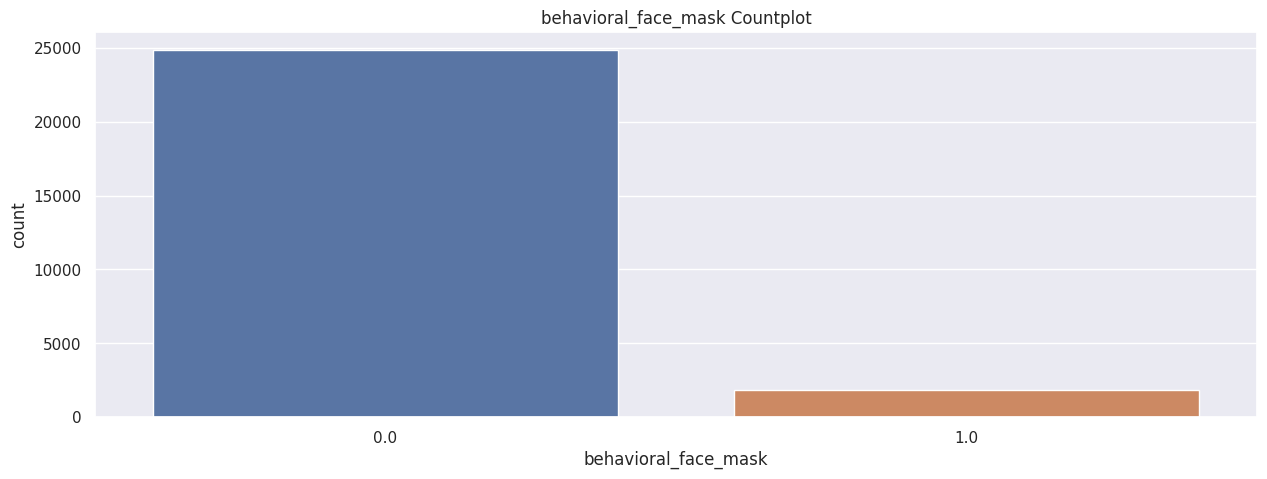

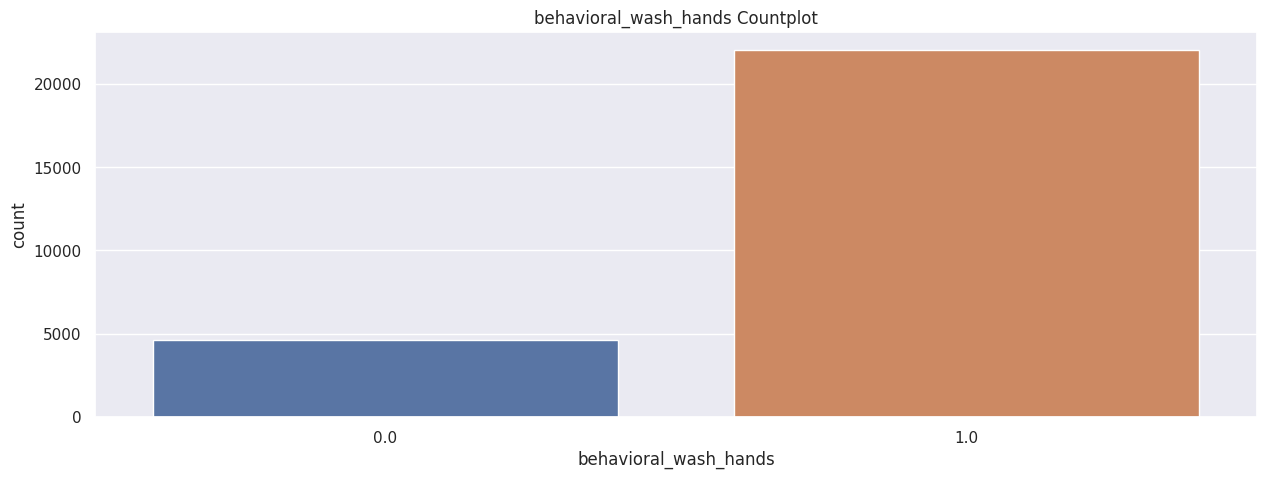

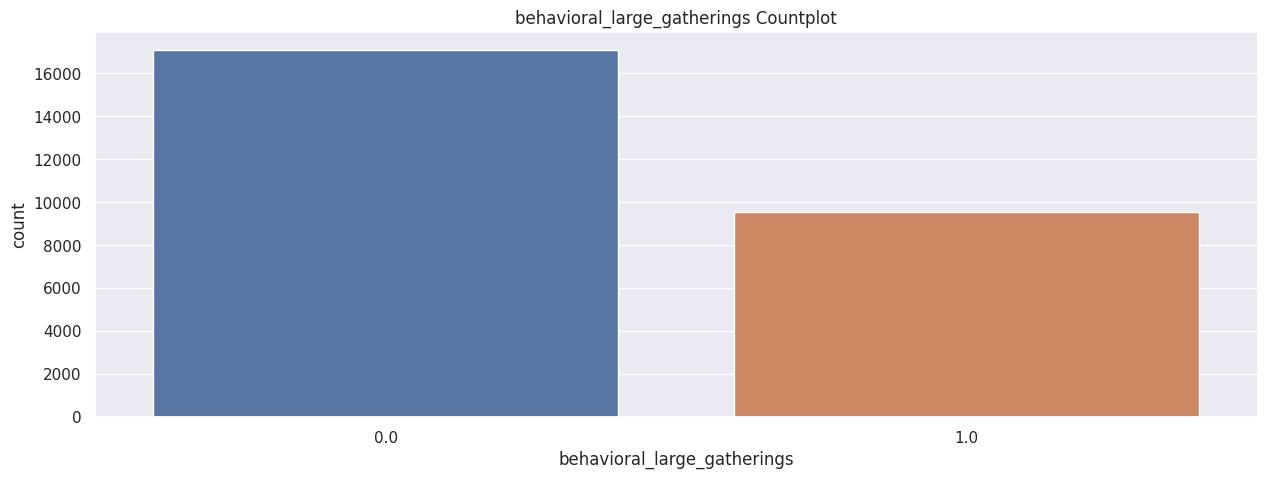

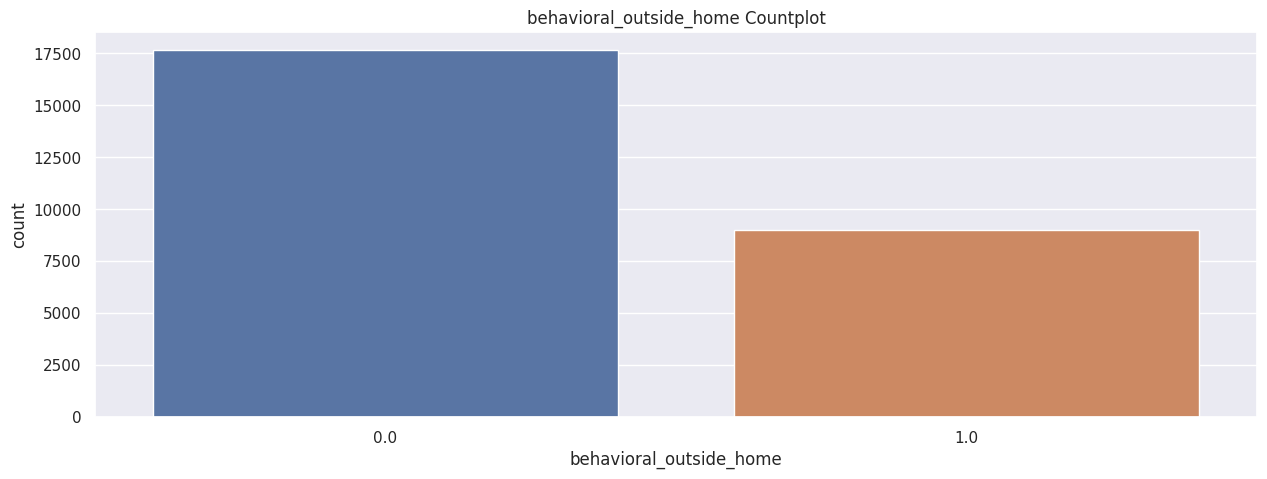

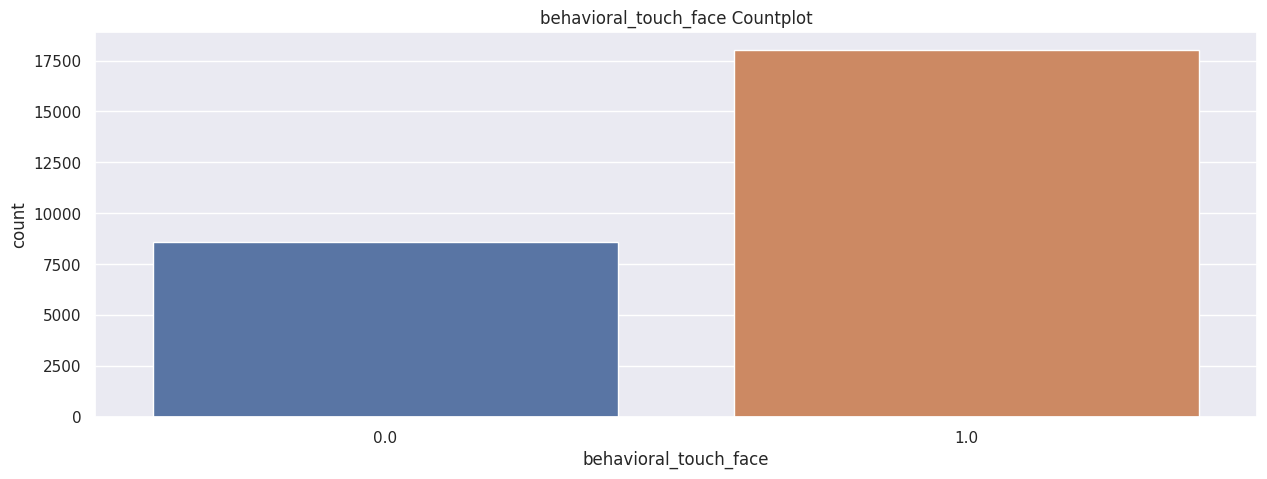

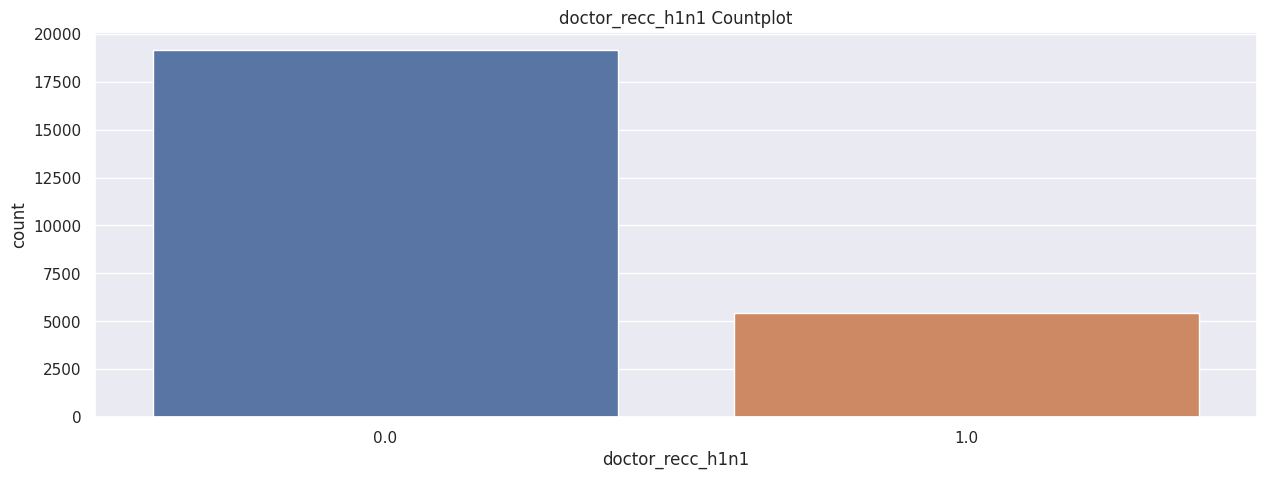

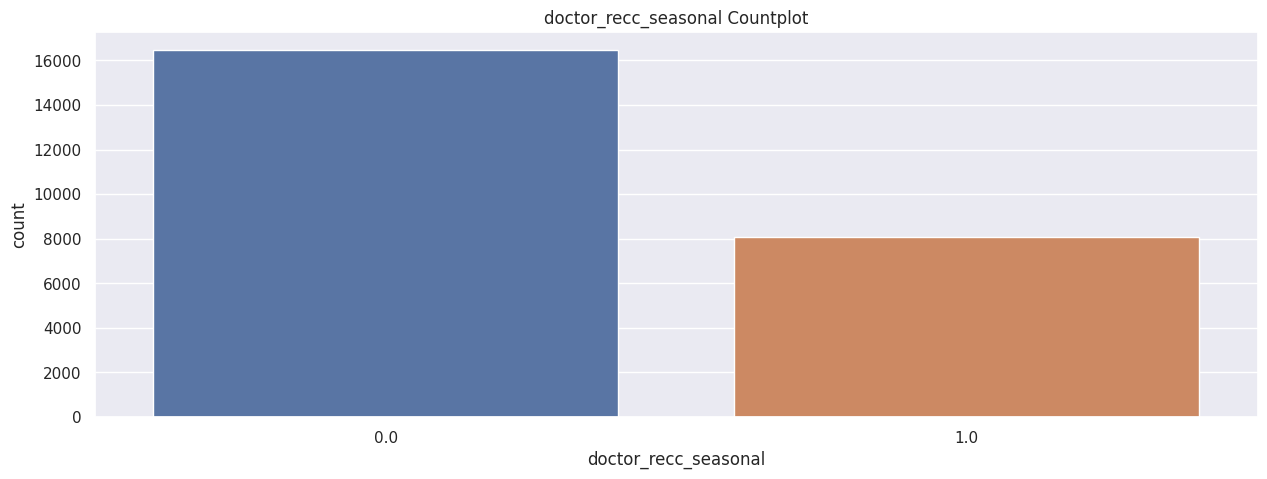

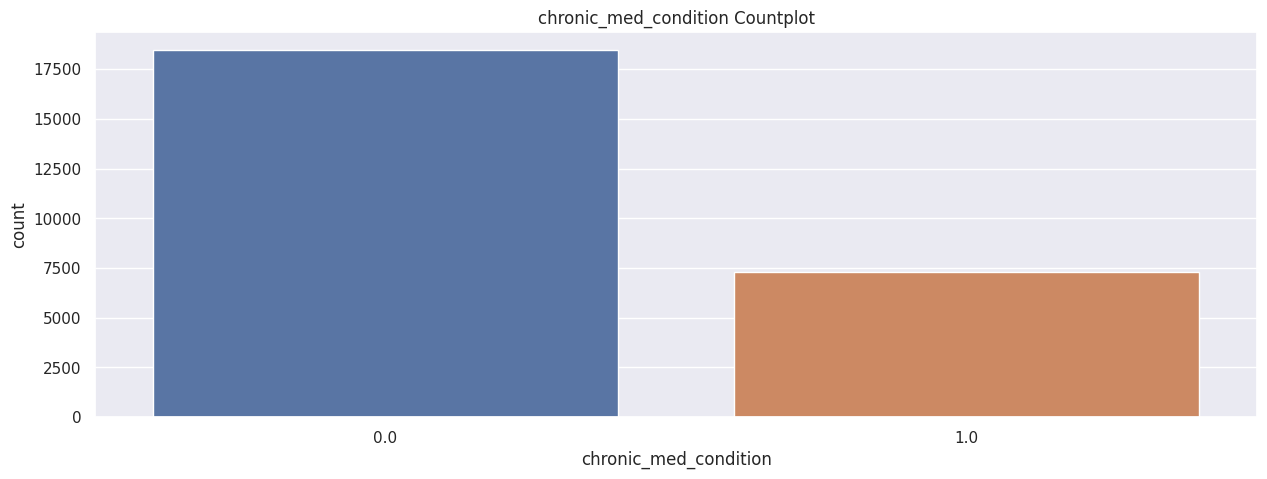

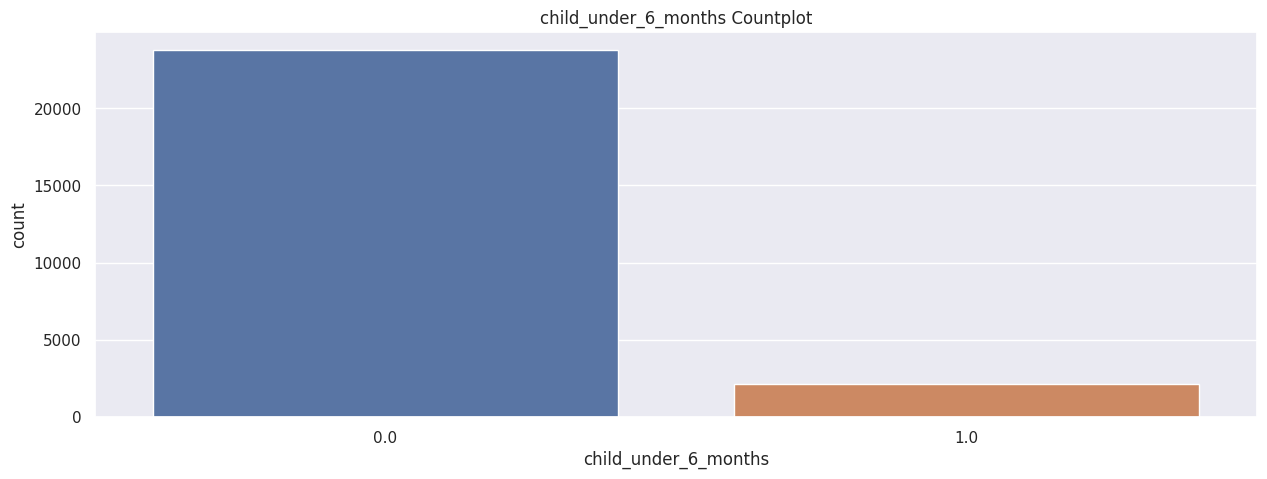

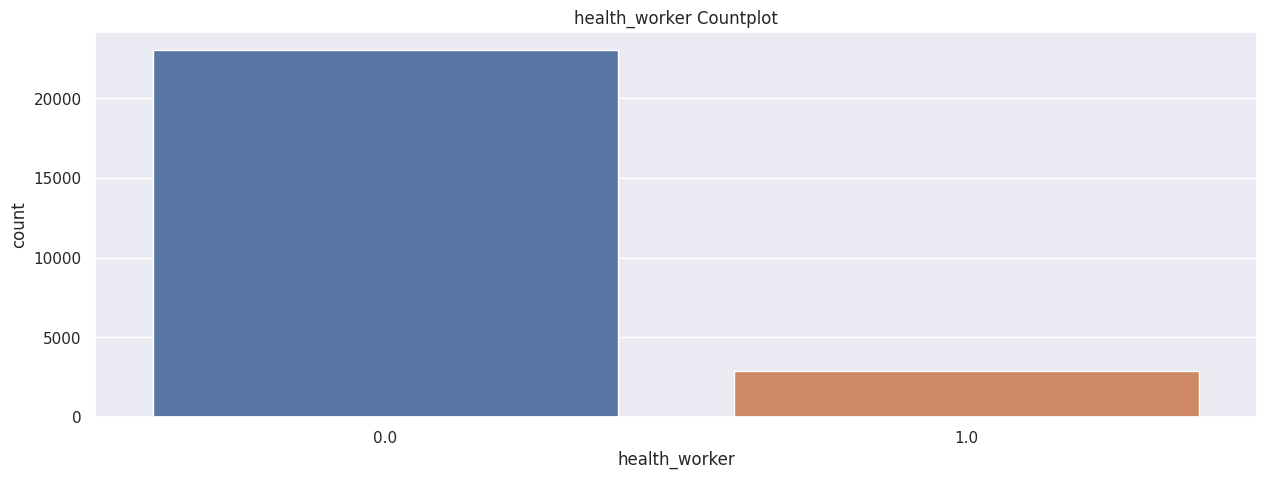

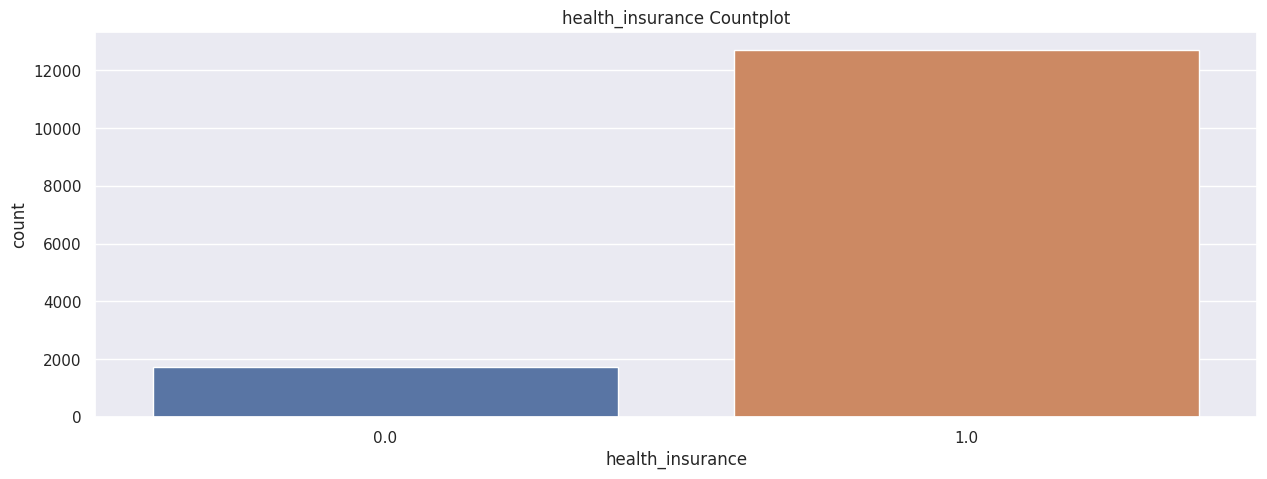

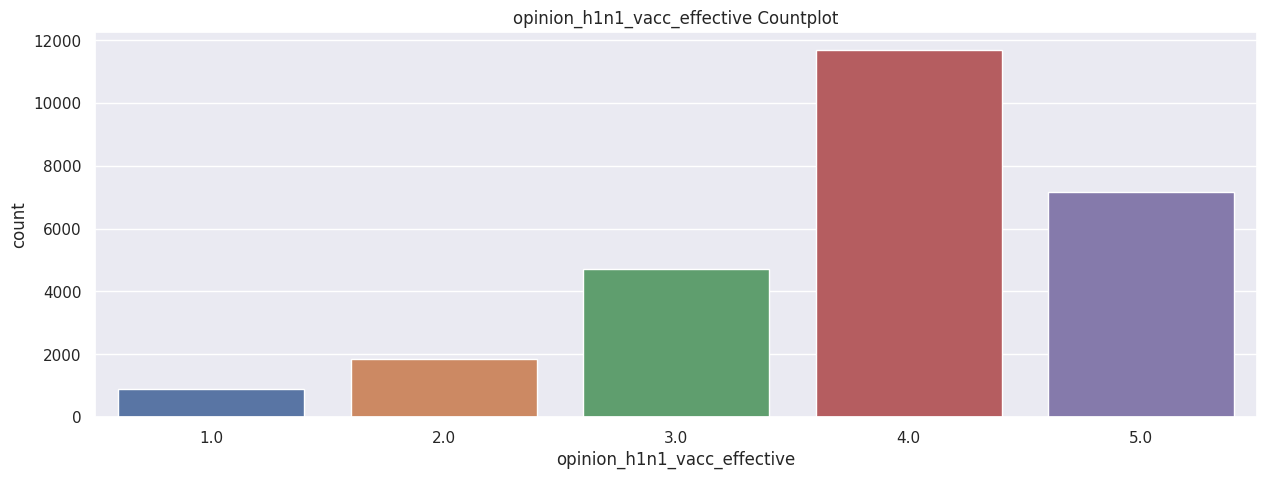

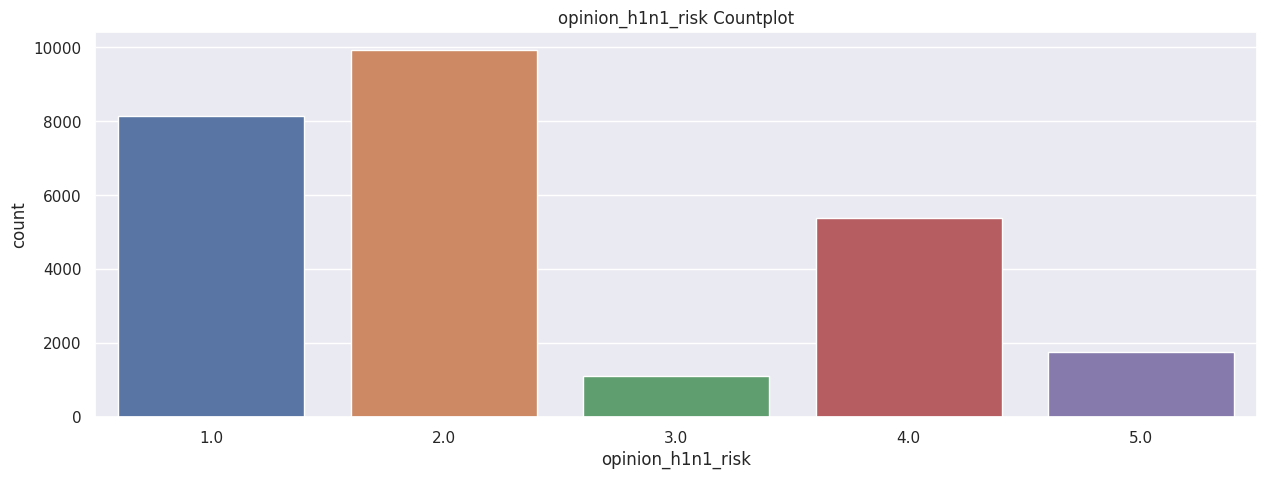

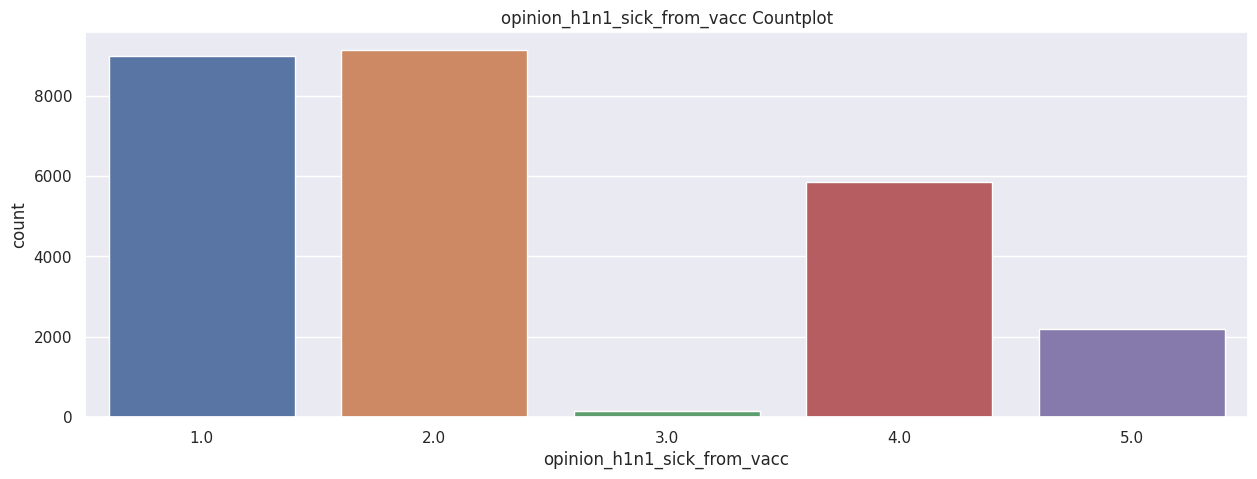

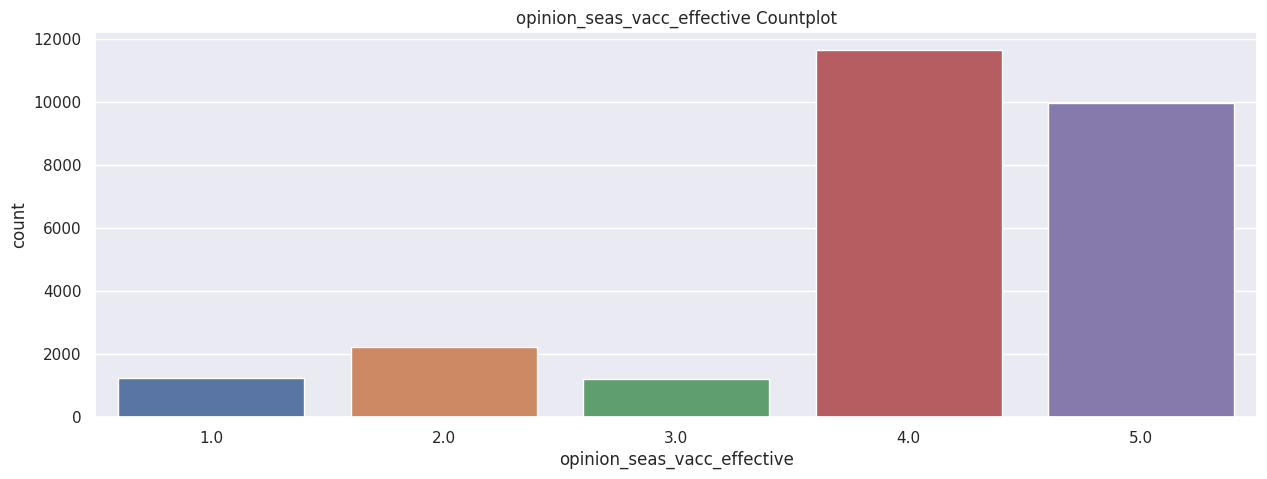

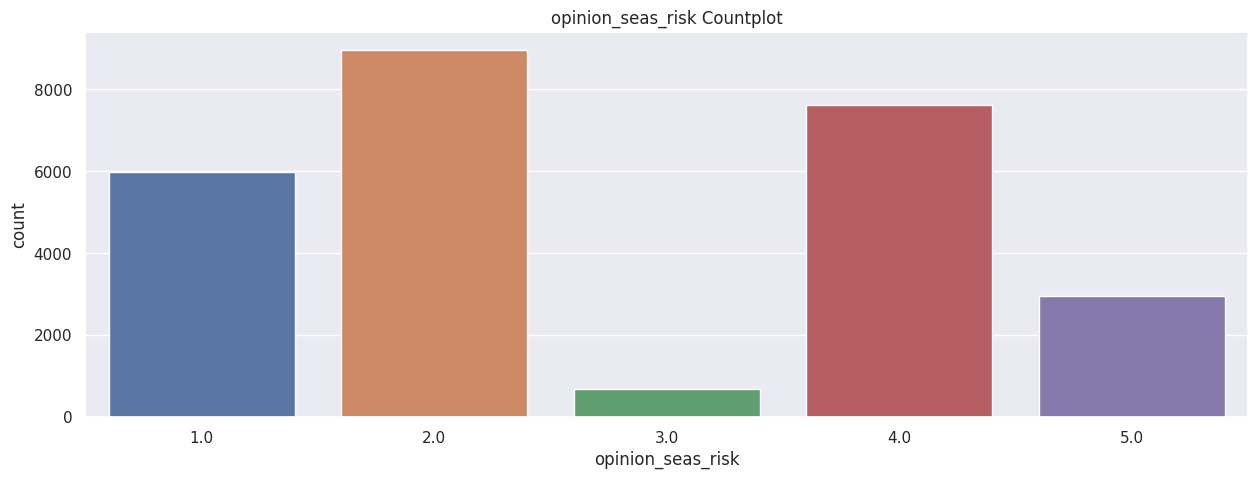

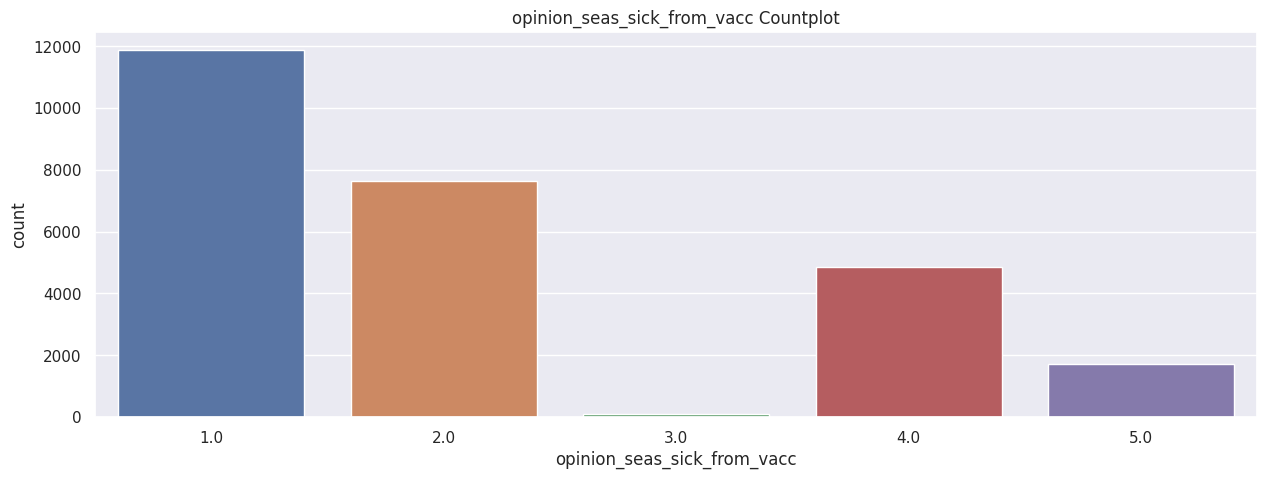

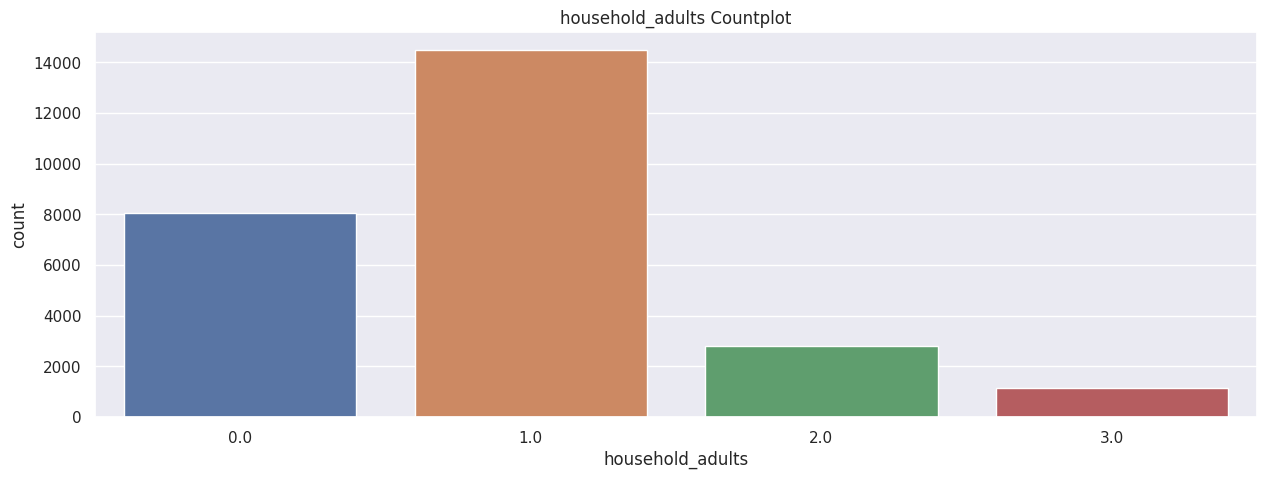

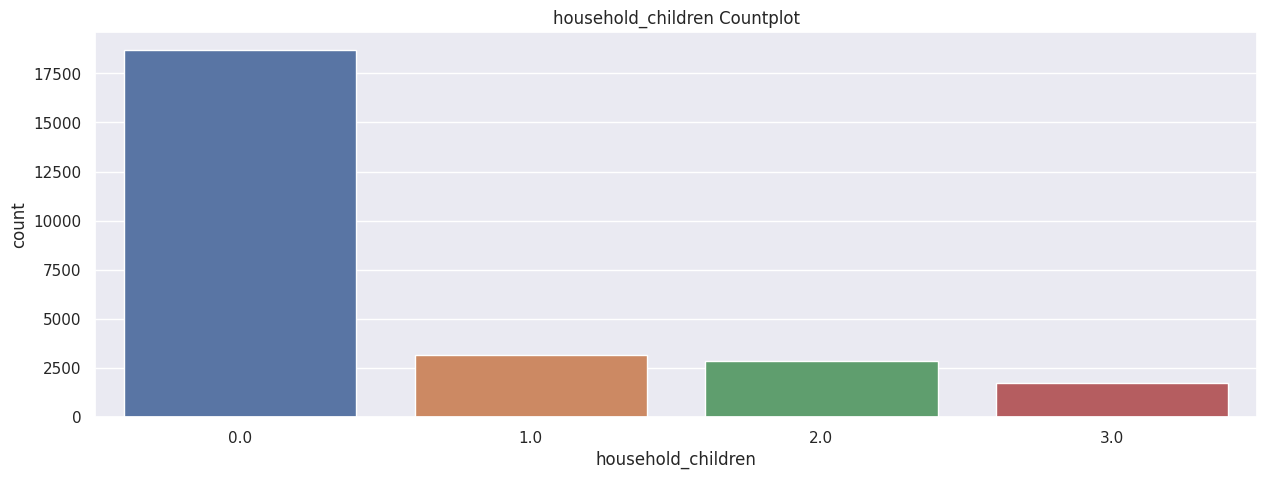

In [ ]:
for col in train_features[train_features.dtypes[train_features.dtypes != "object"].index].columns:
    sns.countplot(x = train_features[col])
    plt.title( col +" Countplot")
    plt.show()


In [ ]:
print('Covariance: ')
print(train_features.cov())
print('-----------------------------------------')
print('Correlation: ')
print(train_features.corr())

Covariance: 
                             h1n1_concern  h1n1_knowledge  \
h1n1_concern                     0.828666        0.035056   
h1n1_knowledge                   0.035056        0.382108   
behavioral_antiviral_meds        0.017707       -0.001444   
behavioral_avoidance             0.094734        0.024457   
behavioral_face_mask             0.035935        0.004704   
behavioral_wash_hands            0.101270        0.021023   
behavioral_large_gatherings      0.111316       -0.014491   
behavioral_outside_home          0.106015       -0.019913   
behavioral_touch_face            0.105453        0.024860   
doctor_recc_h1n1                 0.056535        0.023952   
doctor_recc_seasonal             0.057868        0.020816   
chronic_med_condition            0.038841       -0.006236   
child_under_6_months             0.012370        0.003642   
health_worker                    0.009595        0.032917   
health_insurance                -0.001067        0.023967   
opinion_h1n

<ipython-input-6-5276fa6e9c43>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(train_features.cov())
<ipython-input-6-5276fa6e9c43>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(train_features.corr())


In [ ]:
train_Data = train_features.join(train_labels)

obj_features = train_features[train_features.dtypes[train_features.dtypes == "object"].index].columns
num_features = train_features[train_features.dtypes[train_features.dtypes != "object"].index].columns

print("object features :")
print(obj_features)
print("numerical features :")
print(num_features)

object features :
Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')
numerical features :
Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

num_pipelines = Pipeline([
    ('Standard Scaler', StandardScaler()),
    ('Simple Imputer', SimpleImputer(strategy = 'mean'))
])

cat_pipeline = Pipeline([
     ('Simple Imputer', SimpleImputer(strategy='constant', 
                                      fill_value='missing')),
    ('Label Encoder', OneHotEncoder())
])

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers = [
        ('Numerical', num_pipelines, num_features),
        ('Categorical', cat_pipeline, obj_features)  
    ],
    remainder = "drop"
)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_features,
                                                 train_labels,
                                                 test_size = 0.3,
                                                 random_state = 42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((18694, 35), (8013, 35), (18694, 2), (8013, 2))

In [ ]:
X_train_prep = pd.DataFrame(preprocessor.fit_transform(X_train))
X_val_prep =  pd.DataFrame(preprocessor.transform(X_val))

print ('X_train_prep.shape' , X_train_prep.shape)
print ('X_val_prep.shape' , X_val_prep.shape)

X_train_prep.shape (18694, 112)
X_val_prep.shape (8013, 112)


In [ ]:
test_prep = pd.DataFrame(preprocessor.transform(test_features))
print ('test_prep.shape' , test_prep.shape)

test_prep.shape (26708, 112)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# using 500 estimatores for RFC
model = RandomForestClassifier(n_estimators=500 , criterion = 'log_loss' )
model.fit(X_train_prep, y_train)

RandomForestClassifier(criterion='log_loss', n_estimators=500)

In [ ]:
predict_val = model.predict_proba(X_val_prep)
predict_val

y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": predict_val[0][:, 1],
        "seasonal_vaccine": predict_val[1][:, 1],
    },
    index = y_val.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8013, 2)


,h1n1_vaccine,seasonal_vaccine
15772,0.268,0.356
9407,0.188,0.222
16515,0.134,0.714
23353,0.218,0.302
10008,0.070,0.226


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_preds)

0.8599520038960147

In [ ]:
predict_val = model.predict_proba(test_prep)
predict_val

y_preds_test = pd.DataFrame(
    {
        "h1n1_vaccine": predict_val[0][:, 1],
        "seasonal_vaccine": predict_val[1][:, 1],
    },
    index = test_prep.index
)
print("y_preds.shape:", y_preds_test.shape)
y_preds_test.head()

y_preds.shape: (26708, 2)


,h1n1_vaccine,seasonal_vaccine
0,0.170,0.328
1,0.034,0.050
2,0.300,0.758
3,0.606,0.882
4,0.278,0.506


In [ ]:
submission_format = submission_format.drop(columns=["h1n1_vaccine","seasonal_vaccine"], axis = 1)
flu_submission = submission_format.join(y_preds_test)
print(flu_submission.shape)
flu_submission.head()
flu_submission.to_csv('flu_submission.csv',index=False)

(26708, 3)


In [ ]:
# using 50 estimatores for RFC
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train_prep, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
predict_val = model.predict_proba(X_val_prep)
predict_val

y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": predict_val[0][:, 1],
        "seasonal_vaccine": predict_val[1][:, 1],
    },
    index = y_val.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()


y_preds.shape: (8013, 2)


,h1n1_vaccine,seasonal_vaccine
15772,0.20,0.38
9407,0.18,0.32
16515,0.16,0.82
23353,0.22,0.28
10008,0.12,0.22


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_preds)

0.8501418255327392

In [ ]:
predict_val = model.predict_proba(test_prep)
predict_val

y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": predict_val[0][:, 1],
        "seasonal_vaccine": predict_val[1][:, 1],
    },
    index = test_prep.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (26708, 2)


,h1n1_vaccine,seasonal_vaccine
0,0.18,0.28
1,0.02,0.04
2,0.30,0.82
3,0.62,0.90
4,0.34,0.56


In [ ]:
# using 5 estimatores for RFC
model = RandomForestClassifier(n_estimators=5)
model.fit(X_train_prep, y_train)

RandomForestClassifier(n_estimators=5)

In [ ]:
predict_val = model.predict_proba(X_val_prep)
predict_val

y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": predict_val[0][:, 1],
        "seasonal_vaccine": predict_val[1][:, 1],
    },
    index = y_val.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8013, 2)


,h1n1_vaccine,seasonal_vaccine
15772,0.4,0.2
9407,0.4,0.4
16515,0.2,0.6
23353,0.2,0.2
10008,0.0,0.0


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_preds)


0.7683299629429954

In [ ]:

# from sklearn.model_selection import RandomizedSearchCV

# #define parameter for RandomForestClassifier
# params = {
#     'bootstrap': [True, False],
#     'max_depth': [6,8,10, 20],
#     'max_features': ['log2', 'sqrt'],
#     'min_samples_leaf': [1, 2, 4],
#     'min_samples_split': [2, 5, 10],
#     'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600]
#         }

# rf = RandomForestClassifier()

# random_search = RandomizedSearchCV(estimator=rf, 
#                                    param_distributions=params, 
#                                    scoring='roc_auc', 
#                                    verbose=10)
# random_search.fit(X_train_prep, y_train)

# print(random_search.best_estimator_)
# print(random_search.best_params_)
# print(random_search.best_score_)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

knn.fit(X_train_prep, y_train)

predict_val = knn.predict_proba(X_val_prep)
predict_val

y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": predict_val[0][:, 1],
        "seasonal_vaccine": predict_val[1][:, 1],
    },
    index = y_val.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8013, 2)


,h1n1_vaccine,seasonal_vaccine
15772,0.2,0.2
9407,0.2,0.4
16515,0.0,0.6
23353,0.0,0.2
10008,0.0,0.0


In [ ]:
roc_auc_score(y_val, y_preds)

0.7591986689525249

In [ ]:
acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train_prep,y_train)
    predict_val = knn.predict_proba(X_val_prep)
    predict_val
    y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": predict_val[0][:, 1],
        "seasonal_vaccine": predict_val[1][:, 1],
    },
    index = y_val.index
)
    acc[i-1] = roc_auc_score(y_val, y_preds)
acc

array([0.64469998, 0.69785977, 0.72918113, 0.74646573, 0.75919867,
       0.76877222, 0.77584313, 0.78136094, 0.78747157, 0.79032534,
       0.7942926 , 0.79760414, 0.79988543, 0.80204872, 0.80239933,
       0.8026727 , 0.80369632, 0.80429376, 0.8053774 , 0.80557985])

In [ ]:
# from sklearn.neural_network import MLPClassifier

# mlp_gs = MLPClassifier(max_iter=20)
# parameter_space = {
#     'hidden_layer_sizes': [(10,30,10),(20,)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }
# from sklearn.model_selection import GridSearchCV
# clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
# clf.fit(X_train_prep, y_train)
# print(clf.best_estimator_)
# print(clf.best_params_)
# print(clf.best_score_)

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='gelu'),
    tf.keras.layers.Dense(100, activation='gelu'),
    tf.keras.layers.Dense(100, activation='gelu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=1e-3),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_prep, y_train, epochs=100)

Epoch 1/100
585/585 [==============================] - 5s 3ms/step - loss: 0.4471 - accuracy: 0.6312 - precision: 0.4721 - recall: 0.6925
Epoch 2/100
585/585 [==============================] - 1s 2ms/step - loss: 0.4210 - accuracy: 0.6328 - precision: 0.4737 - recall: 0.6948
Epoch 3/100
585/585 [==============================] - 1s 2ms/step - loss: 0.4084 - accuracy: 0.6335 - precision: 0.4744 - recall: 0.6959
Epoch 4/100
585/585 [==============================] - 1s 2ms/step - loss: 0.3990 - accuracy: 0.6350 - precision: 0.4759 - recall: 0.6981
Epoch 5/100
585/585 [==============================] - 1s 2ms/step - loss: 0.3925 - accuracy: 0.6374 - precision: 0.4782 - recall: 0.7015
Epoch 6/100
585/585 [==============================] - 2s 3ms/step - loss: 0.3867 - accuracy: 0.6369 - precision: 0.4778 - recall: 0.7009
Epoch 7/100
585/585 [==============================] - 2s 4ms/step - loss: 0.3794 - accuracy: 0.6377 - precision: 0.4786 - recall: 0.7021
Epoch 8/100
585/585 [=============